This notebook attempts to analize the data we have and try different methods to recomment and find similarities between barris

### Open Data To Use For Analysis

Open data related to 'comerç local' per barri

In [901]:
import pandas as pd
Barris_data = pd.read_csv('BarriosData.csv')
Barris_data.head()

new_header = Barris_data.loc[1]
Barris_data.head()

,Codi_Districte,Codi_Barri,Barri,Hab,Hab_Muj,Hab_Muj_perc,Hab_Hom,Hab_Hom_Perc,Hab_00_01_Reg,Hab_00_01_Reg_Perc,...,Hab_Renta_bruta_EUR,Dom_renta_EUR,Sup_ha,Sup_m2,Sup_km2,Codi_Barri.1,Mitjana_alquiler_EUR,Maxim_alquiler_mes_EUR,Minim_alquiler_mes_EUR,valor_promedio_venta_Local_EUR
0,1,1,el Raval,46520,21761,"46,8",24759,"53,2",5872,"12,6",...,"€11,778.52","€31,809.05",110.0,1100000,1.100,1,"2,176","5,307",583,"308,282"
1,1,2,el Barri Gòtic,22748,8824,"38,8",13924,"61,2",4040,"17,8",...,"€16,390.33","€38,015.44",81.6,816000,0.816,2,"2,632","5,312",786,"419,304"
2,1,3,la Barceloneta,14342,7222,"50,4",7120,"49,6",1845,"12,9",...,"€15,094.27","€32,700.09",109.5,1095000,1.095,3,"2,135","4,400",400,"149,422"
3,1,4,"Sant Pere, Santa Caterina i la Ribera",22418,11232,"50,1",11186,"49,9",3058,"13,6",...,"€17,332.08","€38,797.92",111.0,1110000,1.110,4,"2,482","5,300",426,"379,157"
4,2,5,el Fort Pienc,33445,17419,"52,1",16026,"47,9",3209,"9,6",...,"€21,988.95","€52,896.15",92.9,929000,0.929,5,"2,224","4,146",636,"642,789"


In [902]:
Barris_data.keys()

Index(['Codi_Districte', 'Codi_Barri', 'Barri', 'Hab', 'Hab_Muj',
       'Hab_Muj_perc', 'Hab_Hom', 'Hab_Hom_Perc', 'Hab_00_01_Reg',
       'Hab_00_01_Reg_Perc', 'Hab_01_05_Reg', 'Hab_01_05_Reg_Perc',
       'Hab_06_15_Reg', 'Hab_06_15_Reg_Perc', 'Hab_15_nn_Reg',
       'Hab_15_nn_Reg_perc', 'Hab_00_15_Age', 'Hab_00_15_Age_Perc',
       'Hab_16_24_Age', 'Hab_16_24_Age_Perc', 'Hab_25_39_Age',
       'Hab_25_39_Age_Perc', 'Hab_40_64_Age', 'Hab_40_64_Age_Perc',
       'Hab_65_nn_Age', 'Hab_65_nn_Age_Perc', 'Dom', 'Dom_01_Pers',
       'Dom_01_Pers_Perc', 'Dom_02_Pers', 'Dom_02_Pers_Perc', 'Dom_03_Pers',
       'Dom_03_Pers_Perc', 'Dom_04_Pers', 'Dom_04_Pers_Perc', 'Dom_05_Pers',
       'Dom_05_Pers_Perc', 'Dom_06_Pers', 'Dom_06_Pers_Perc', 'Dom_07_Pers',
       'Dom_07_Pers_Perc', 'Dom_08_Pers', 'Dom_08_Pers_Perc', 'Dom_09_nn_Pers',
       'Dom_09_nn_Pers_Perc', 'Hab_Nac_BCN', 'Hab_Nac_BCN_Perc', 'Hab_Nac_CAT',
       'Hab_Nac_CAT_Perc', 'Hab_Nac_ESP', 'Hab_Nac_ESP_Perc', 'Hab_Nac_WWW',
 

Keep the keys that we are interested in

In [903]:
cols2keep = ["Dom_renta_EUR", "Mitjana_alquiler_EUR", "Hab", "Barri", "Sup_m2"]
Barris_data = Barris_data[cols2keep]

In [904]:
Barris_data["densidad"] = Barris_data["Hab"] / Barris_data["Sup_m2"]

Open a second dataset with information about the cens comercial

In [905]:
census_data = pd.read_csv('2019_censcomercialbcn_detall.csv')
census_data.head()

C:\Users\Maria\AppData\Local\Temp\ipykernel_63560\3861244603.py:1: DtypeWarning: Columns (35,37) have mixed types. Specify dtype option on import or set low_memory=False.
  census_data = pd.read_csv('2019_censcomercialbcn_detall.csv')


,ID_Bcn_2019,ID_Bcn_2016,Codi_Principal_Activitat,Nom_Principal_Activitat,Codi_Sector_Activitat,Nom_Sector_Activitat,Codi_Grup_Activitat,Nom_Grup_Activitat,Codi_Activitat_2019,Nom_Activitat,...,Solar,Codi_Parcela,Codi_Illa,Seccio_Censal,Codi_Barri,Nom_Barri,Codi_Districte,Nom_Districte,Referencia_cadastral,Data_Revisio
0,1075454,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
1,1075453,NaN,1,Actiu,2,Serveis,16,Altres,1600102,Activitats emmagatzematge,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
2,1075451,NaN,1,Actiu,2,Serveis,16,Altres,1600400,Serveis a les empreses i oficines,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
3,1075449,NaN,1,Actiu,3,Altres,17,Altres,1700100,Administració,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0
4,1075448,NaN,1,Actiu,2,Serveis,16,Altres,1600101,Activitats de transport,...,NaN,NaN,NaN,25.0,12,la Marina del Prat Vermell,3,Sants-Montjuïc,NaN,20190925.0


In [906]:
census_data["Nom_Sector_Activitat"].unique()

array(['Serveis', 'Altres', 'Comerç al detall', 'Sense informació',
       'Sense informació - Havia tingut activitat (rètol)', 'En reforma',
       'Locals buits en venda i lloguer', 'Locals buits en lloguer',
       'Locals buits en venda', 'Comerç al detall /Engròs'], dtype=object)

In [907]:
len(census_data["Nom_Principal_Activitat"][census_data["Nom_Principal_Activitat"] == "Sense activitat Econòmica"])

18996

Look how many locals we have available for renting / buying

In [908]:
census_data_imp = census_data[["Nom_Barri", "Nom_Sector_Activitat"]]
ds_merge = census_data_imp[census_data["Nom_Principal_Activitat"] == "Sense activitat Econòmica"].groupby("Nom_Barri").count()
ds_merge.head()

,Nom_Sector_Activitat
Nom_Barri,
Baró de Viver,44
Can Baró,171
Can Peguera,23
Canyelles,69
Ciutat Meridiana,78


In [909]:
# Merge both datasets in one
Barris_data = pd.merge(Barris_data, ds_merge, left_on="Barri", right_on="Nom_Barri")
rename = {"Nom_Sector_Activitat": "Locals_buits_en_venda_i_lloguer"}
Barris_data.rename(columns=rename, inplace=True)
Barris_data.head()

,Dom_renta_EUR,Mitjana_alquiler_EUR,Hab,Barri,Sup_m2,densidad,Locals_buits_en_venda_i_lloguer
0,"€31,809.05","2,176",46520,el Raval,1100000,0.042291,558
1,"€38,015.44","2,632",22748,el Barri Gòtic,816000,0.027877,394
2,"€32,700.09","2,135",14342,la Barceloneta,1095000,0.013098,169
3,"€38,797.92","2,482",22418,"Sant Pere, Santa Caterina i la Ribera",1110000,0.020196,481
4,"€52,896.15","2,224",33445,el Fort Pienc,929000,0.036001,199


In [910]:
# transform Dom_renta_EUR to float 
Barris_data["Dom_renta_EUR"] = Barris_data["Dom_renta_EUR"].str.replace("€", "")
Barris_data["Dom_renta_EUR"] = Barris_data["Dom_renta_EUR"].str.replace(",", "")
Barris_data["Dom_renta_EUR"] = Barris_data["Dom_renta_EUR"].astype(float)

In [911]:
# change nan to 0
Barris_data.replace("--", 0, inplace=True)

In [912]:
# transform mitjana alquiler to float
Barris_data["Mitjana_alquiler_EUR"] = Barris_data["Mitjana_alquiler_EUR"].str.replace(",", ".")
Barris_data["Mitjana_alquiler_EUR"] = Barris_data["Mitjana_alquiler_EUR"].astype(float)

In [913]:
rename = {"Dom_renta_EUR": "Media_Renta_Por_Hogar", 
          "Mitjana_alquiler_EUR": "Precio_Medio_Alquiler_Local", 
          "Hab": "Habitantes"}

Barris_data.rename(columns=rename, inplace=True)

In [914]:
Barris_data.head()

,Media_Renta_Por_Hogar,Precio_Medio_Alquiler_Local,Habitantes,Barri,Sup_m2,densidad,Locals_buits_en_venda_i_lloguer
0,31809.05,2.176,46520,el Raval,1100000,0.042291,558
1,38015.44,2.632,22748,el Barri Gòtic,816000,0.027877,394
2,32700.09,2.135,14342,la Barceloneta,1095000,0.013098,169
3,38797.92,2.482,22418,"Sant Pere, Santa Caterina i la Ribera",1110000,0.020196,481
4,52896.15,2.224,33445,el Fort Pienc,929000,0.036001,199


In [915]:
Barris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Media_Renta_Por_Hogar            68 non-null     float64
 1   Precio_Medio_Alquiler_Local      54 non-null     float64
 2   Habitantes                       68 non-null     int64  
 3   Barri                            68 non-null     object 
 4   Sup_m2                           68 non-null     int64  
 5   densidad                         68 non-null     float64
 6   Locals_buits_en_venda_i_lloguer  68 non-null     int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 3.8+ KB


In [916]:
Barris_data_noName = Barris_data.drop(["Barri"], axis=1)

Correlation matrix of the data we are considering per barri

<Axes: >

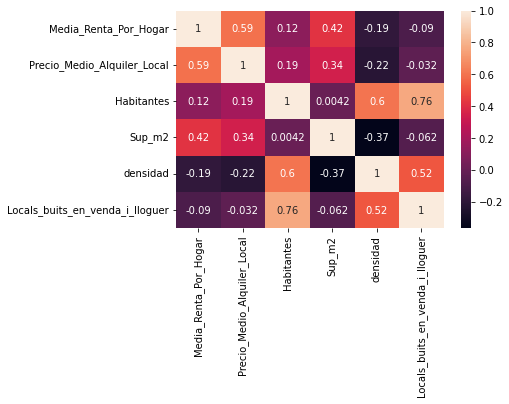

In [917]:
import seaborn as sns

sns.heatmap(Barris_data_noName.corr(), annot=True)

Create a dataset with the amout of locals of each sector per barri

In [918]:
cols2keep = ["Nom_Barri", "Nom_Grup_Activitat"]
sectorPerBarri = census_data[cols2keep]
sectorPerBarri = sectorPerBarri.groupby(["Nom_Barri", "Nom_Grup_Activitat"]).size().unstack()
sectorPerBarri.fillna(0, inplace=True)

# normalize per row
sectorPerBarri_norm = sectorPerBarri.div(sectorPerBarri.sum(axis=1), axis=0)

# do the mean per sector
# mean = sectorPerBarri2.mean(axis=0)
# mean

# substract the mean to the normalized data
# sectorPerBarri2 = sectorPerBarri2.sub(mean, axis=1)
sectorPerBarri_norm

Nom_Grup_Activitat,Activitats immobiliàries,Altres,Automoció,Ensenyament,Equipament personal,Equipaments culturals i recreatius,Finances i assegurances,Grup no definit,"Manteniment, neteja i producció",Oci i cultura,Parament de la llar,Quotidià alimentari,Quotidià no alimentari,Reparacions (Electrodomèstics i automòbils),"Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)",Sanitat i assistència
Nom_Barri,,,,,,,,,,,,,,,,
Baró de Viver,0.000000,0.142857,0.000000,0.051948,0.000000,0.038961,0.000000,0.571429,0.000000,0.000000,0.012987,0.064935,0.025974,0.000000,0.077922,0.012987
Can Baró,0.000000,0.203883,0.000000,0.009709,0.006472,0.006472,0.003236,0.553398,0.000000,0.006472,0.006472,0.077670,0.035599,0.022654,0.061489,0.006472
Can Peguera,0.000000,0.204545,0.000000,0.068182,0.000000,0.045455,0.000000,0.522727,0.000000,0.000000,0.000000,0.022727,0.045455,0.000000,0.045455,0.045455
Canyelles,0.005714,0.131429,0.005714,0.028571,0.011429,0.011429,0.017143,0.394286,0.005714,0.000000,0.005714,0.194286,0.051429,0.028571,0.102857,0.005714
Ciutat Meridiana,0.004926,0.182266,0.000000,0.029557,0.024631,0.004926,0.039409,0.384236,0.000000,0.014778,0.014778,0.147783,0.034483,0.014778,0.088670,0.014778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
la Vila Olímpica del Poblenou,0.021882,0.321663,0.004376,0.056893,0.019694,0.008753,0.024070,0.164114,0.002188,0.015317,0.004376,0.056893,0.021882,0.015317,0.242888,0.019694
la Vila de Gràcia,0.008077,0.264303,0.001122,0.030289,0.080772,0.015481,0.010096,0.264752,0.001571,0.024232,0.034552,0.083240,0.032757,0.011218,0.113305,0.024232
les Corts,0.014827,0.294069,0.007825,0.030478,0.066722,0.010708,0.030066,0.175453,0.003295,0.022241,0.024712,0.087727,0.032125,0.014827,0.142092,0.042834


In [919]:
# we drop this value because it means it is not defined
sectorPerBarri_norm.drop(["Grup no definit"], axis=1, inplace=True)

In [920]:
Barris_data.set_index("Barri", inplace=True)
Barris_data_norm = Barris_data.div(Barris_data.sum(axis=1), axis=0)
Barris_data_norm

,Media_Renta_Por_Hogar,Precio_Medio_Alquiler_Local,Habitantes,Sup_m2,densidad,Locals_buits_en_venda_i_lloguer
Barri,,,,,,
el Raval,0.026982,0.000002,0.039461,0.933082,3.587352e-08,0.000473
el Barri Gòtic,0.043339,0.000003,0.025934,0.930275,3.178149e-08,0.000449
la Barceloneta,0.028629,0.000002,0.012556,0.958665,1.146696e-08,0.000148
"Sant Pere, Santa Caterina i la Ribera",0.033113,0.000002,0.019133,0.947342,1.723684e-08,0.000411
el Fort Pienc,0.052087,0.000002,0.032933,0.914782,3.545010e-08,0.000196
...,...,...,...,...,...,...
Diagonal Mar i el Front Marítim del Poblenou,0.048461,0.000002,0.010475,0.941011,8.707158e-09,0.000052
el Besòs i el Maresme,0.026763,0.000002,0.021167,0.951950,1.786247e-08,0.000119
Provençals del Poblenou,0.039940,0.000002,0.018286,0.941508,1.683768e-08,0.000264


In [921]:
index = Barris_data_norm.index

In [922]:
# merge Barris data and sector per barri
Barris_data_norm = pd.merge(Barris_data_norm, sectorPerBarri_norm, left_on="Barri", right_on="Nom_Barri")
Barris_data_norm.head()

,Media_Renta_Por_Hogar,Precio_Medio_Alquiler_Local,Habitantes,Sup_m2,densidad,Locals_buits_en_venda_i_lloguer,Activitats immobiliàries,Altres,Automoció,Ensenyament,...,Equipaments culturals i recreatius,Finances i assegurances,"Manteniment, neteja i producció",Oci i cultura,Parament de la llar,Quotidià alimentari,Quotidià no alimentari,Reparacions (Electrodomèstics i automòbils),"Restaurants, bars i hotels (Inclòs hostals, pensions i fondes)",Sanitat i assistència
0,0.026982,0.000002,0.039461,0.933082,3.587352e-08,0.000473,0.003369,0.240229,0.000337,0.017520,...,0.020889,0.012129,0.000000,0.044811,0.028302,0.163073,0.027291,0.003032,0.181941,0.004717
1,0.043339,0.000003,0.025934,0.930275,3.178149e-08,0.000449,0.001322,0.229617,0.000441,0.007492,...,0.027766,0.013222,0.000000,0.023799,0.020273,0.046717,0.032613,0.000000,0.226091,0.001763
2,0.028629,0.000002,0.012556,0.958665,1.146696e-08,0.000148,0.013387,0.194110,0.000000,0.022758,...,0.012048,0.009371,0.000000,0.022758,0.010710,0.135207,0.026774,0.006693,0.267738,0.018742
3,0.033113,0.000002,0.019133,0.947342,1.723684e-08,0.000411,0.007791,0.247021,0.000458,0.017874,...,0.025665,0.007791,0.000000,0.010082,0.023831,0.096242,0.025665,0.000917,0.180568,0.005500
4,0.052087,0.000002,0.032933,0.914782,3.545010e-08,0.000196,0.009993,0.345468,0.012848,0.020700,...,0.015703,0.011420,0.000714,0.024268,0.051392,0.097074,0.037830,0.023555,0.149179,0.016417


In [923]:
Barris_data_norm.isnull().sum()

Media_Renta_Por_Hogar                                              0
Precio_Medio_Alquiler_Local                                       14
Habitantes                                                         0
Sup_m2                                                             0
densidad                                                           0
Locals_buits_en_venda_i_lloguer                                    0
Activitats immobiliàries                                           0
Altres                                                             0
Automoció                                                          0
Ensenyament                                                        0
Equipament personal                                                0
Equipaments culturals i recreatius                                 0
Finances i assegurances                                            0
Manteniment, neteja i producció                                    0
Oci i cultura                     

In [924]:
# remove the rows with nan
Barris_data_norm.dropna(inplace=True)

#### Apply a Kmeans to see if we can find clusters in the data

In [925]:
from sklearn.cluster import KMeans

# set the number of clusters
kmeans = KMeans(n_clusters=3)
# fit the model
kmeans.fit(Barris_data_norm)
# predict the clusters
clusters = kmeans.predict(Barris_data_norm)

C:\Users\Maria\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


We apply a PCA to reduce the dimensionality of the data and be able to plot it in 2 dimensions

In [926]:
# do a pca to 2 components
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(Barris_data_norm)
# transform the data
pca_data = pca.transform(Barris_data_norm)

print how much importance has each component from the original data to create this 2 new features

In [927]:
components = pd.DataFrame(pca.components_)
components = components.transpose()
components = components * 100
components = components.round(4)
components.index = Barris_data_norm.columns
components

,0,1
Media_Renta_Por_Hogar,-24.7168,-10.2147
Precio_Medio_Alquiler_Local,-0.0008,0.0001
Habitantes,-3.6324,-1.1920
Sup_m2,28.4600,11.3537
densidad,-0.0000,0.0000
Locals_buits_en_venda_i_lloguer,-0.1099,0.0529
Activitats immobiliàries,1.4040,-5.0331
Altres,24.2648,-85.8563
Automoció,0.7916,-3.9520
Ensenyament,1.8289,-13.5795


In [928]:
correspondanceNames = {}
for v in (zip(index, Barris_data_norm.index)):
    # print(v)
    correspondanceNames[v[1]] = v[0]

Plot the data in this 2 new features

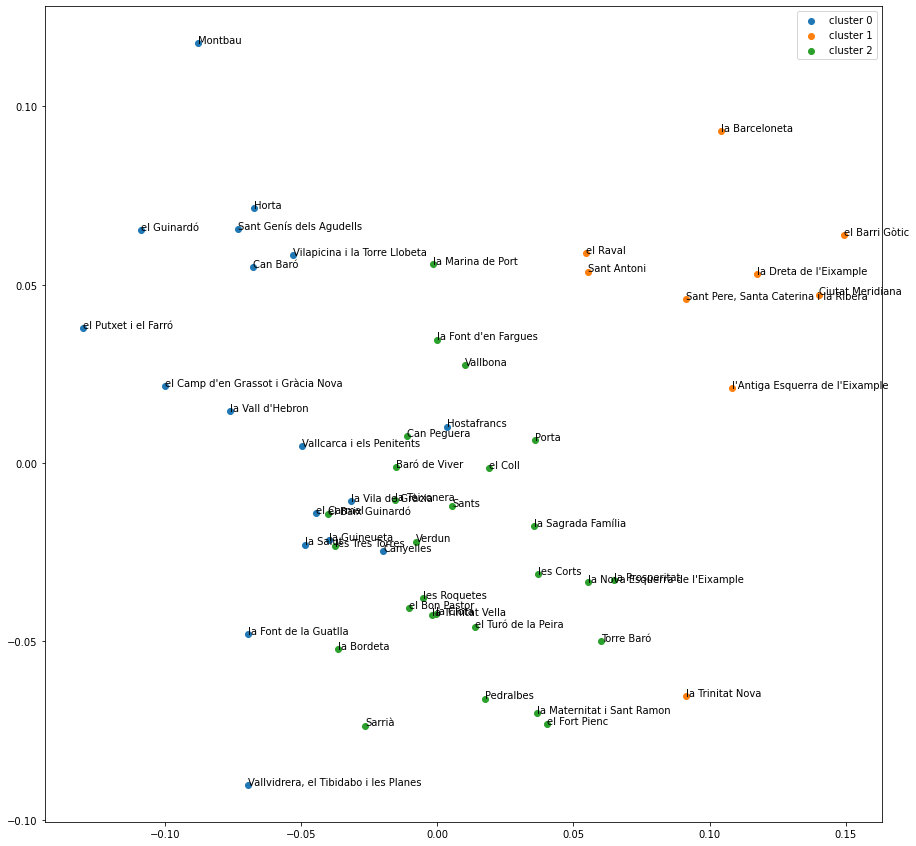

In [929]:
# plot the data with the clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
for i in range(3):
    plt.scatter(pca_data[clusters==i,0], pca_data[clusters==i,1], label="cluster {}".format(i))
    for x, y, name in zip(pca_data[clusters==i,0], pca_data[clusters==i,1], Barris_data_norm.index[clusters==i]):
        plt.text(x, y, correspondanceNames[name])
plt.legend()
plt.show()

In [930]:
# show the list of the barrios per cluster
Barris_data_norm["cluster"] = clusters
Barris_data_norm["cluster"].value_counts()

print(Barris_data_norm[Barris_data_norm["cluster"] == 0].index)

print(Barris_data_norm[Barris_data_norm["cluster"] == 1].index)

print(Barris_data_norm[Barris_data_norm["cluster"] == 2].index)


Index([11, 12, 20, 23, 24, 26, 27, 28, 31, 32, 38, 40, 44, 45, 49, 51, 56, 57], dtype='int64')
Index([0, 1, 2, 3, 6, 7, 9, 61, 63], dtype='int64')
Index([ 4,  5,  8, 10, 13, 14, 15, 16, 19, 21, 22, 25, 29, 37, 39, 46, 53, 54,
       55, 58, 59, 60, 62, 64, 65, 66, 67],
      dtype='int64')


#### Look at the correlation between barris to be able to give recommendations based on similarity

In [931]:
Barris_data_norm.index = [correspondanceNames[x] for x in Barris_data_norm.index]
corr = Barris_data_norm.T.corr()

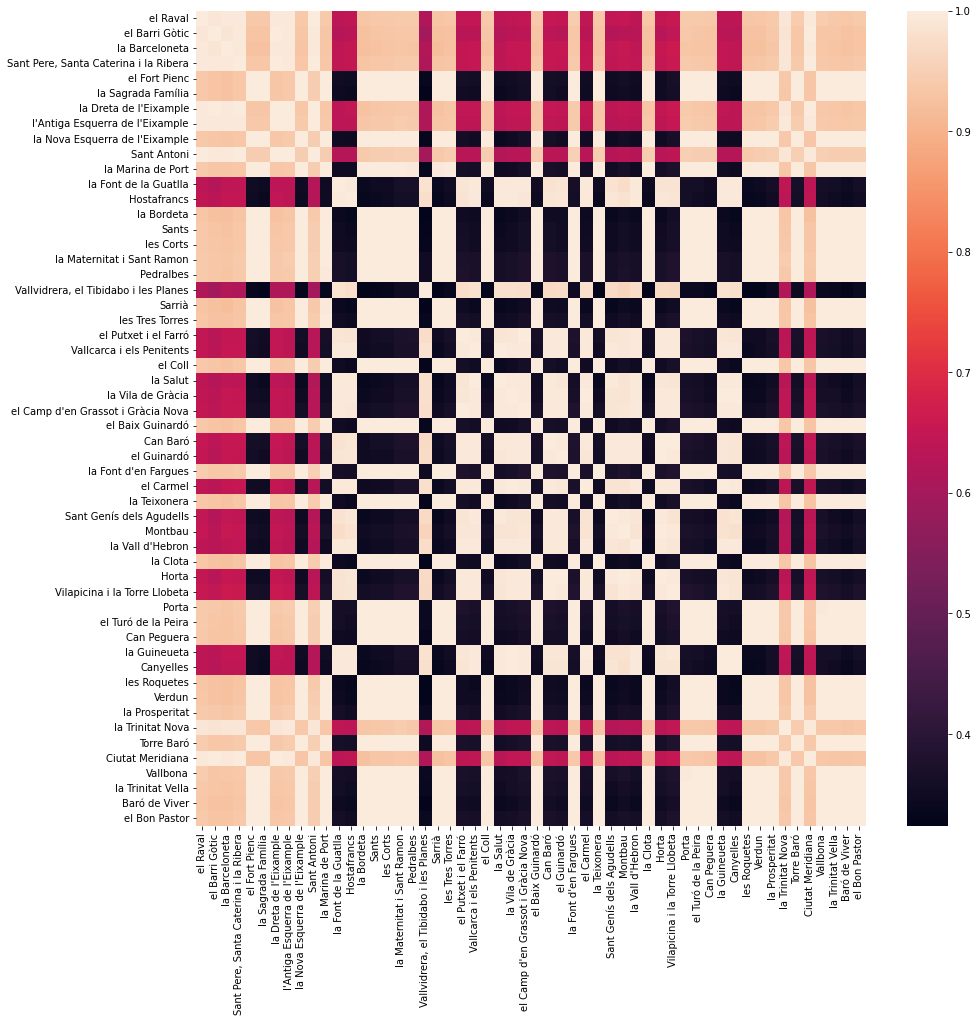

In [932]:
# plot the correlation
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(corr, annot=False)
plt.show()

In [933]:
Barris_data.reset_index(inplace=True)
Barris_data

,Barri,Media_Renta_Por_Hogar,Precio_Medio_Alquiler_Local,Habitantes,Sup_m2,densidad,Locals_buits_en_venda_i_lloguer
0,el Raval,31809.05,2.176,46520,1100000,0.042291,558
1,el Barri Gòtic,38015.44,2.632,22748,816000,0.027877,394
2,la Barceloneta,32700.09,2.135,14342,1095000,0.013098,169
3,"Sant Pere, Santa Caterina i la Ribera",38797.92,2.482,22418,1110000,0.020196,481
4,el Fort Pienc,52896.15,2.224,33445,929000,0.036001,199
...,...,...,...,...,...,...,...
63,Diagonal Mar i el Front Marítim del Poblenou,61952.71,2.651,13391,1203000,0.011131,66
64,el Besòs i el Maresme,33314.62,2.121,26349,1185000,0.022235,148
65,Provençals del Poblenou,46069.17,2.255,21092,1086000,0.019422,305
66,Sant Martí de Provençals,42305.83,1.812,25852,734000,0.035221,207


#### Example of use

Imagine I want to rent a local in "la Barceloneta" 

In [934]:
Barris_data[Barris_data["Barri"] == "la Barceloneta"]

,Barri,Media_Renta_Por_Hogar,Precio_Medio_Alquiler_Local,Habitantes,Sup_m2,densidad,Locals_buits_en_venda_i_lloguer
2,la Barceloneta,32700.09,2.135,14342,1095000,0.013098,169


We can have information like medium price of renting a local, medium income per household, number of habitants or the density.
That is really important information when it comes to deciding where to open a bussiness.

<Axes: title={'center': 'Number of locals per sector in la Barceloneta'}, xlabel='Sector', ylabel='Number of locals'>

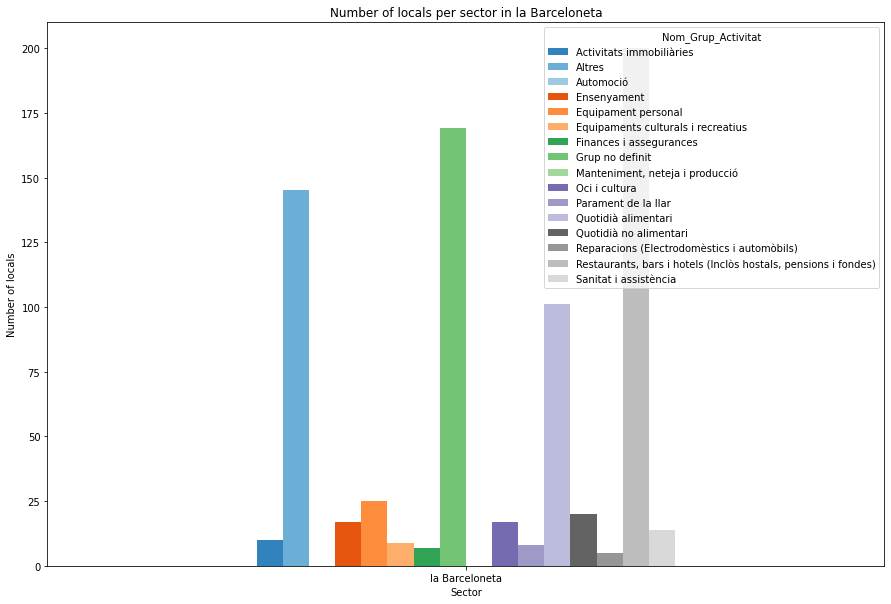

In [935]:
sectorPerBarri[sectorPerBarri.index == "la Barceloneta"].plot(kind="bar", figsize=(15,10), cmap="tab20c", xlabel="Sector", ylabel="Number of locals", title="Number of locals per sector in la Barceloneta", xticks=None, rot=0)

Right now we have this amout of bussiness per sector

<Axes: title={'center': 'Number of locals per sector in la Barceloneta'}, xlabel='Sector', ylabel='Number of locals'>

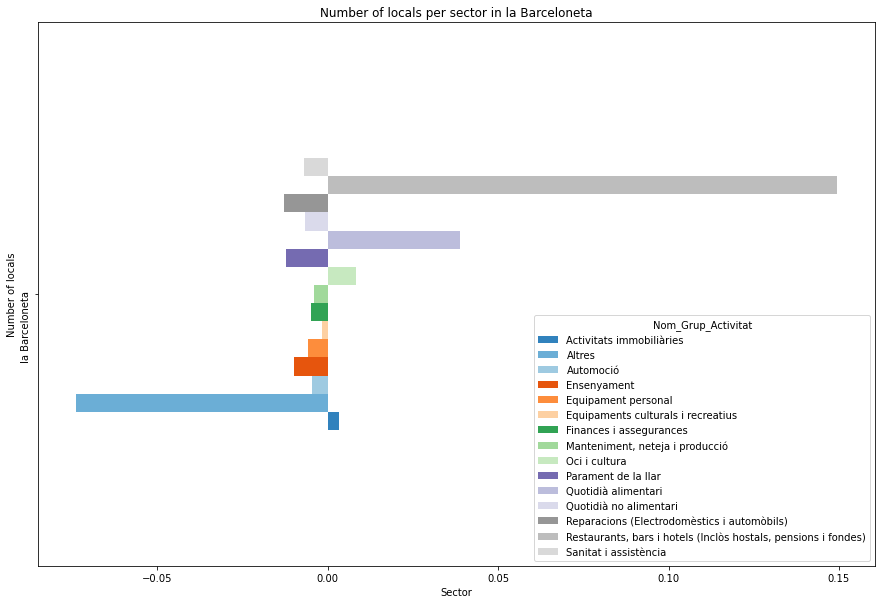

In [936]:
mean = sectorPerBarri_norm.mean(axis = 0)

# substract the mean to the normalized data
sectorPerBarri_norm = sectorPerBarri_norm.sub(mean, axis=1)
sectorPerBarri_norm[sectorPerBarri_norm.index == "la Barceloneta"].plot(kind="barh", figsize=(15,10), cmap="tab20c", xlabel="Sector", ylabel="Number of locals", title="Number of locals per sector in la Barceloneta", xticks=None, rot=90)

There is a need of automoció bussiness compared to other barcelona barris, that can be useful information to decide which kind of bussiness we want to open

#### Recoomending similar barris

In [940]:
corr = Barris_data_norm.T.corr()

Most correlated barris to "la Barceloneta"

<Axes: title={'center': 'Correlation between la Barceloneta and the other barrios'}, xlabel='Barrio', ylabel='Correlation'>

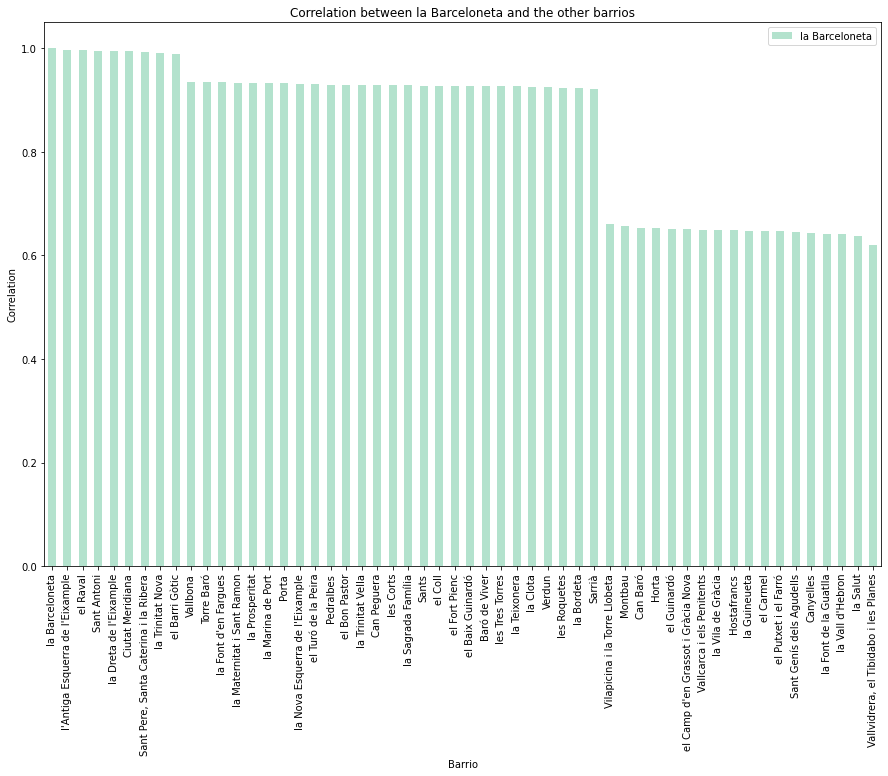

In [953]:
corr2 = corr[corr.index == "la Barceloneta"].sort_values(by="la Barceloneta", axis=1, ascending=False)
corr2.T.plot(kind="bar", figsize=(15,10), cmap="Pastel2", title= "Correlation between la Barceloneta and the other barrios", xlabel="Barrio", ylabel="Correlation")

From this list we can see where it can be interesting to look for other options to buy a local. It would be interesting to do an analysis of prices and potential customers, etc. And based on that recommed certain barries.